In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import PowerTransformer
from IPython.display import Image
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans 
from kneed import KneeLocator
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df1= pd.read_csv("CC GENERAL.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df1['MINIMUM_PAYMENTS'].fillna((df1['MINIMUM_PAYMENTS'].mean()), inplace = True)
df1['CREDIT_LIMIT'].fillna((df1['CREDIT_LIMIT'].mean()), inplace = True)

In [7]:
df1 = df1.drop("CUST_ID", axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [8]:
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

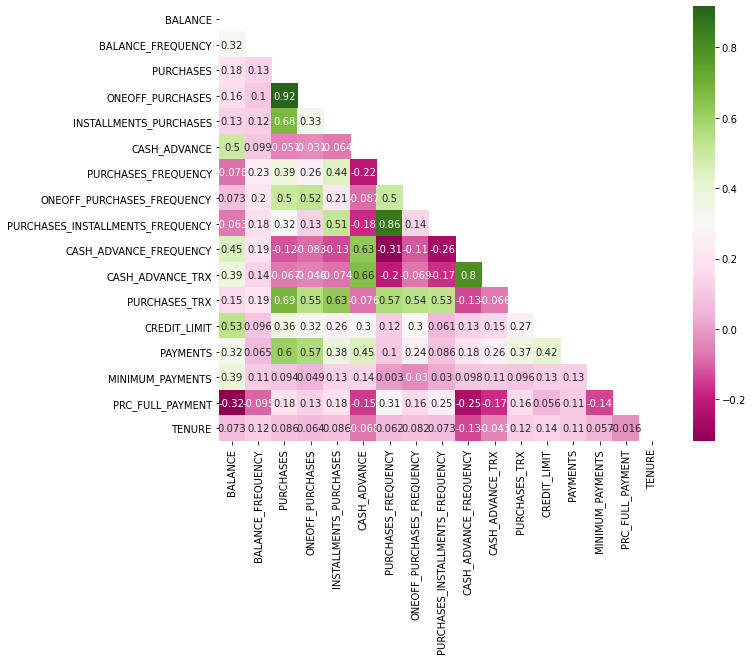

In [9]:
corr = df1.corr()
f, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='PiYG')

### Checking the distribution of data and outliers in the dataset

In [10]:
numerical_features = [col for col in df1.columns]

<AxesSubplot:>

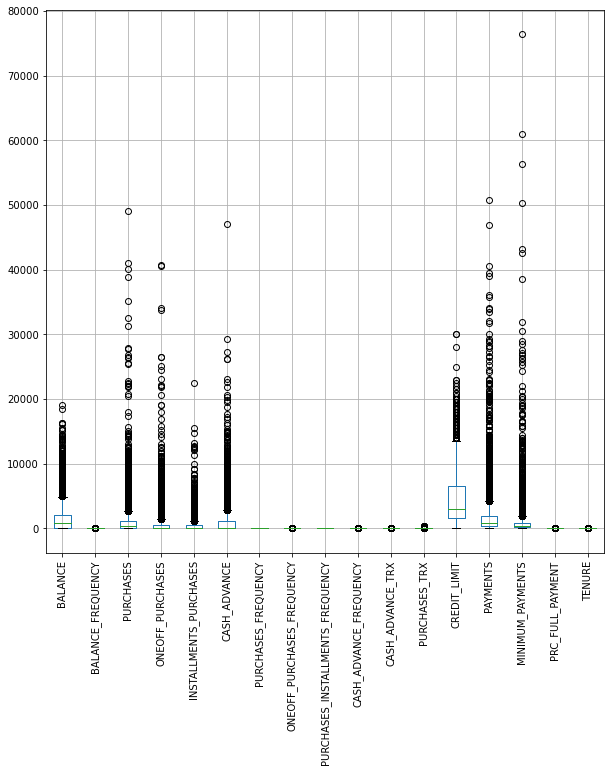

In [11]:
df1[numerical_features].boxplot(figsize=(10, 10), rot = 90)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

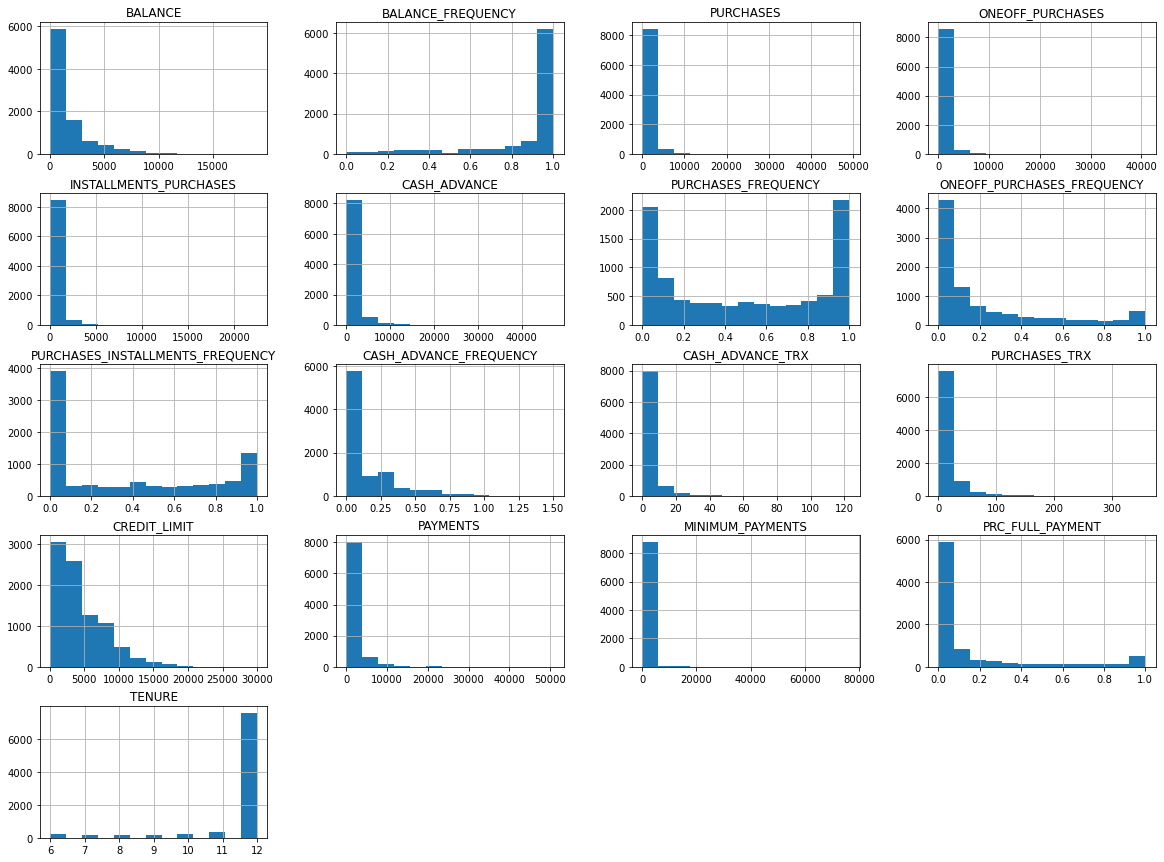

In [12]:
df1.hist(bins=13, figsize=(20, 15), layout=(5, 4))

### Scaling and normalizing data

In [14]:
standard = StandardScaler().fit_transform(df1)

In [15]:
normalized_df = normalize(standard) 

In [16]:
df = pd.DataFrame(standard) 

### Using PCA (principal component analysis) as it is believed that it improves the clustering results by doing dimensionality reduction to guarantee more accurate results

In [17]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

### Slicing dataset to only "CREDIT_LIMIT" and "BALANCE" columns to apply kmeans on them

In [18]:
X = df.iloc[:,[12,0]]
X.head()

,12,0
0,-0.960433,-0.731989
1,0.688639,0.786961
2,0.826062,0.447135
3,0.826062,0.049099
4,-0.905464,-0.358775


### Calculating K by the elbow method for the best results

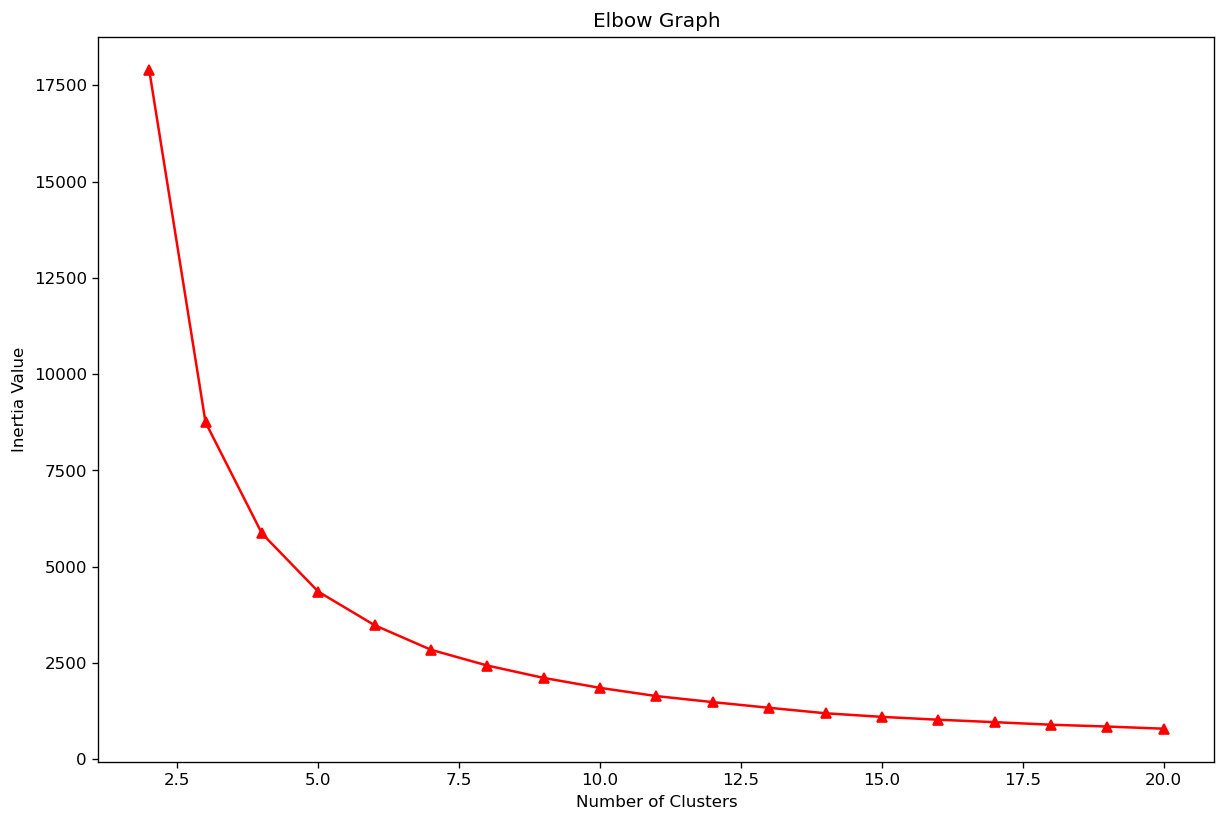

In [19]:
inertia_values = []

for k in range(1, 20):
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

### Displaying the best K value and plotting it

In [20]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [21]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
X = X.values

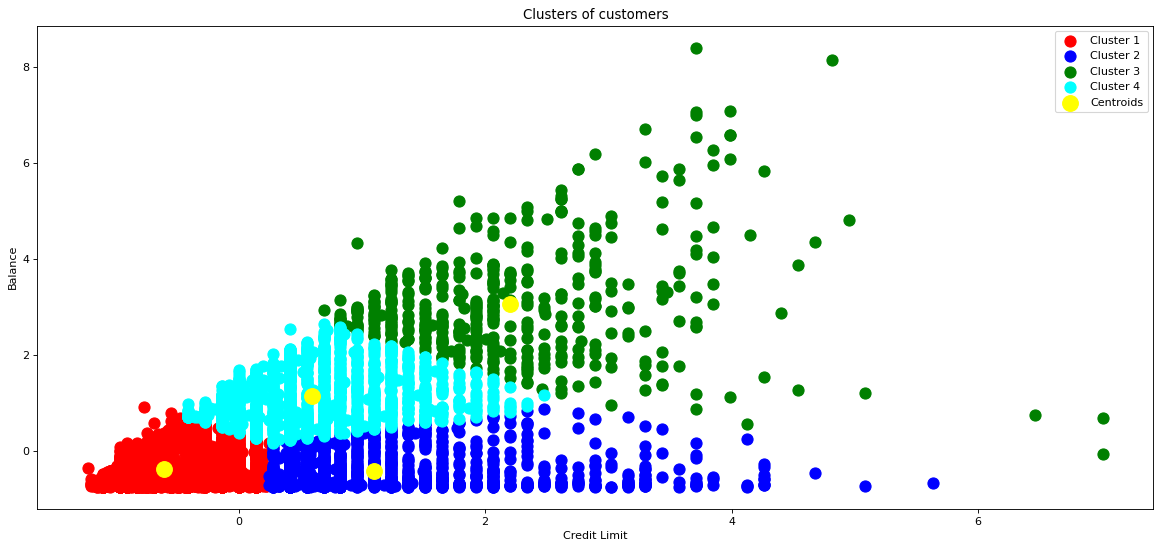

In [22]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

### Trying out different k value rather than the optimal to check the difference

In [23]:
kmeans=KMeans(n_clusters=2, random_state=0)  #Cluster our data by choosing 5 as number of clusters
y_kmeans=kmeans.fit_predict(X)

In [24]:
kmeans.predict(X)

array([1, 0, 0, ..., 1, 1, 1])

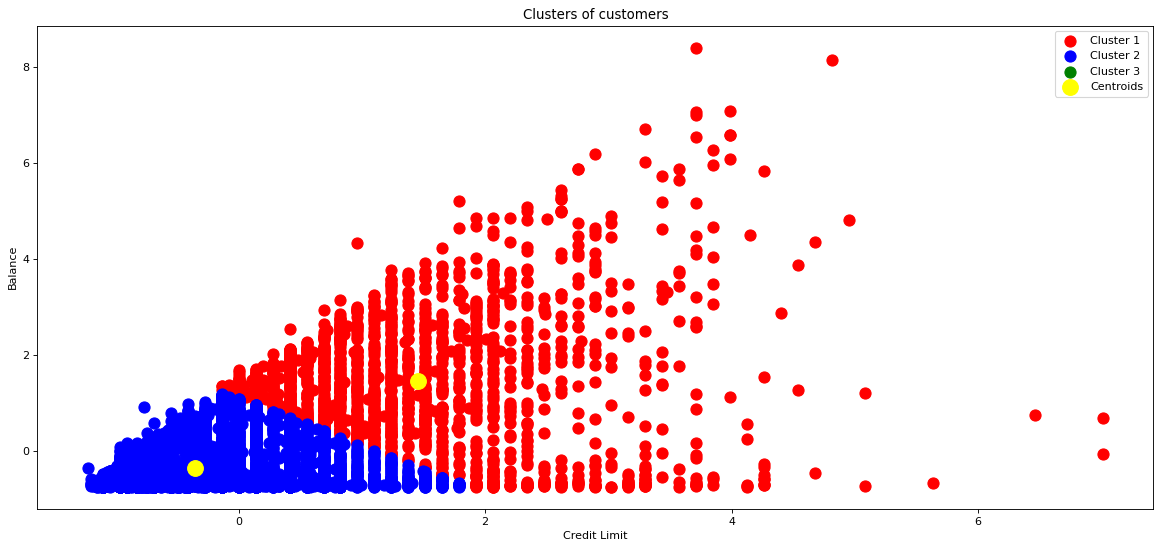

In [25]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

### It's obvious there are a lot of biased clusters and data points that were supposed to be in a cluster alone, as well as more outliers to handle 

### Slicing dataset to only "CASH_ADVANCE_TRX" and "PAYMENTS" columns to apply kmeans on them

In [26]:
Y = df.iloc[:,[10,13]]
Y.head()

,10,13
0,-0.476070,-0.528979
1,0.110074,0.818642
2,-0.476070,-0.383805
3,-0.329534,-0.598688
4,-0.476070,-0.364368


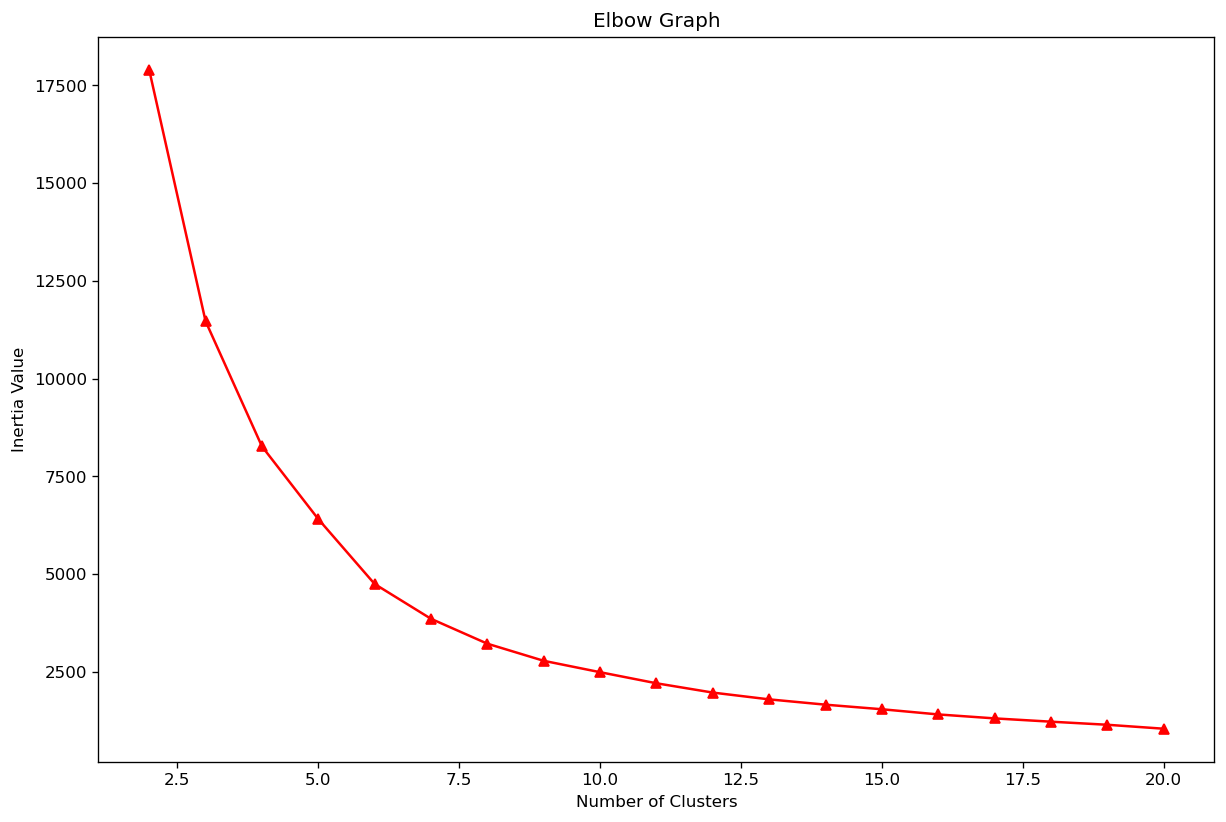

In [27]:
inertia_values = []

for k in range(1, 20):
    model1 = KMeans(n_clusters = k)
    model1.fit(Y)
    inertia_values.append(model1.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [28]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

5

In [29]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(Y)
Y = Y.values

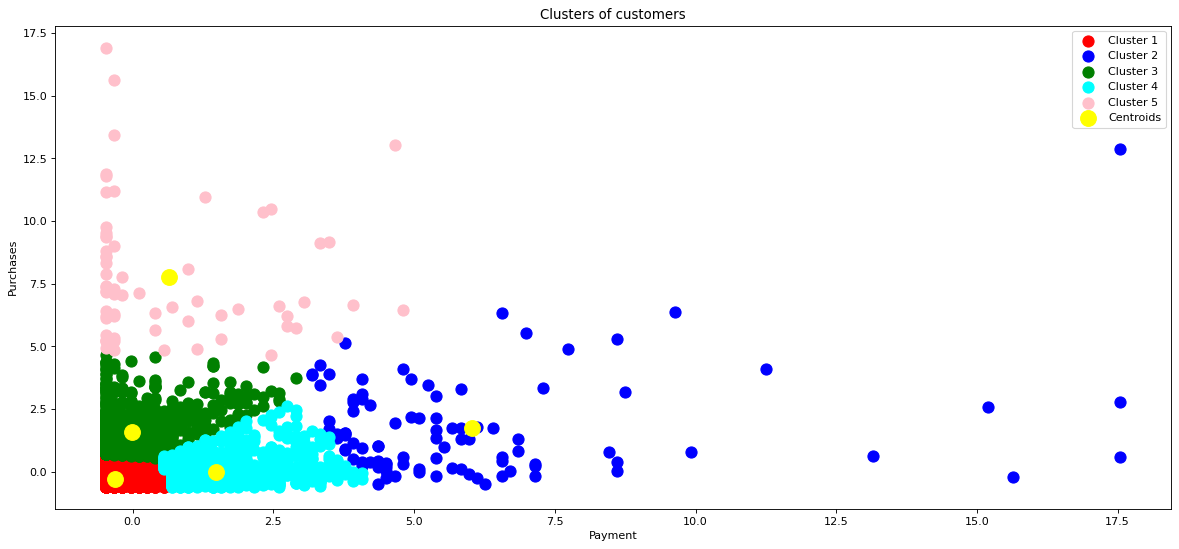

In [30]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Y[y_kmeans == 4, 0], Y[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Payment')
plt.ylabel('Purchases')
plt.legend()
plt.show()

### Checking the same X and Y data but without the outliers to know if outlier removal would enhance the clusters' formation

In [31]:
# Create a copy of data
dframe = df.copy()
list(dframe)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [32]:
standardScaler = StandardScaler().fit_transform(dframe)

In [33]:
Q1 = dframe.quantile(q=.25)
Q3 = dframe.quantile(q=.75)
IQR = dframe.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
dframe = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
dframe.shape

(2972, 17)

In [34]:
X2 = dframe.iloc[:,[12,0]]
X2.head()

,12,0
0,-0.960433,-0.731989
4,-0.905464,-0.358775
7,-0.603134,0.124520
8,0.688639,-0.264026
14,-0.410743,0.580517


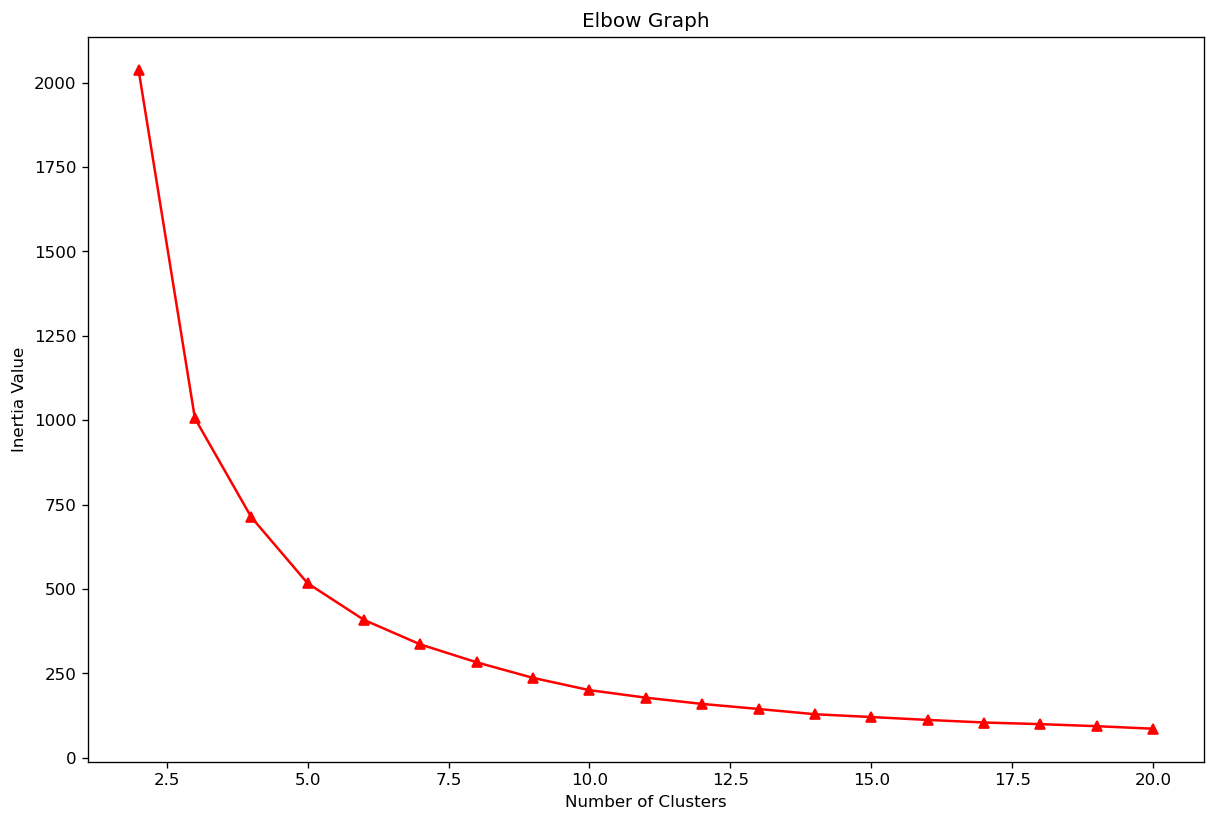

In [35]:
inertia_values = []

for k in range(1, 20):
    model2 = KMeans(n_clusters = k)
    model2.fit(X2)
    inertia_values.append(model2.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [36]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

5

In [37]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 20)
y_kmeans = kmeans.fit_predict(X2)
X2 = X2.values

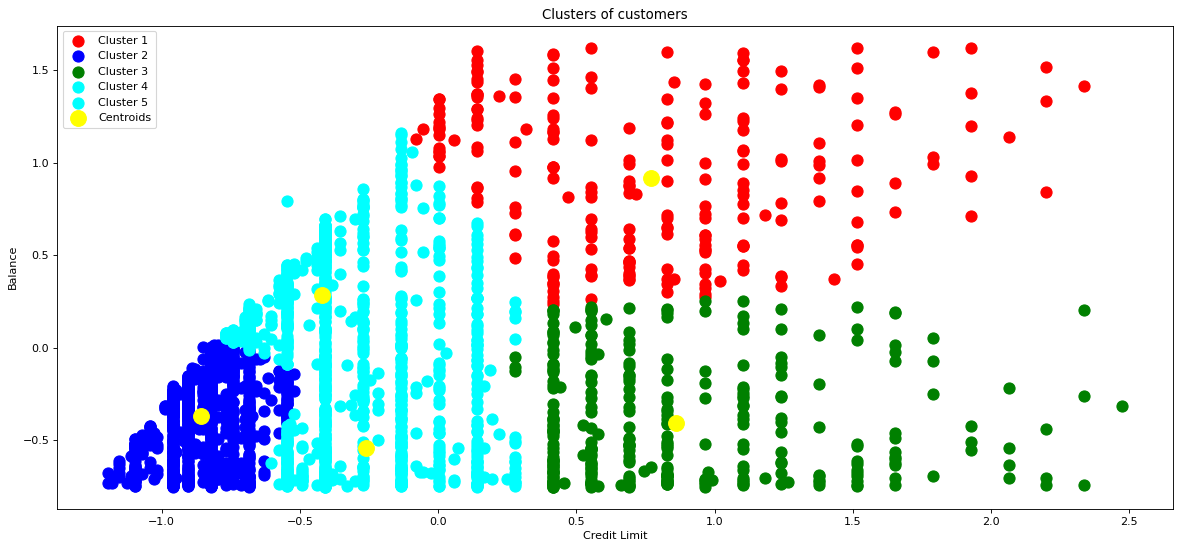

In [38]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 100, c = 'cyan', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

In [39]:
Y2 = dframe.iloc[:,[10,13]]
Y2.head()

,10,13
0,-0.476070,-0.528979
4,-0.476070,-0.364368
7,-0.476070,-0.364116
8,-0.476070,-0.360933
14,-0.329534,-0.320389


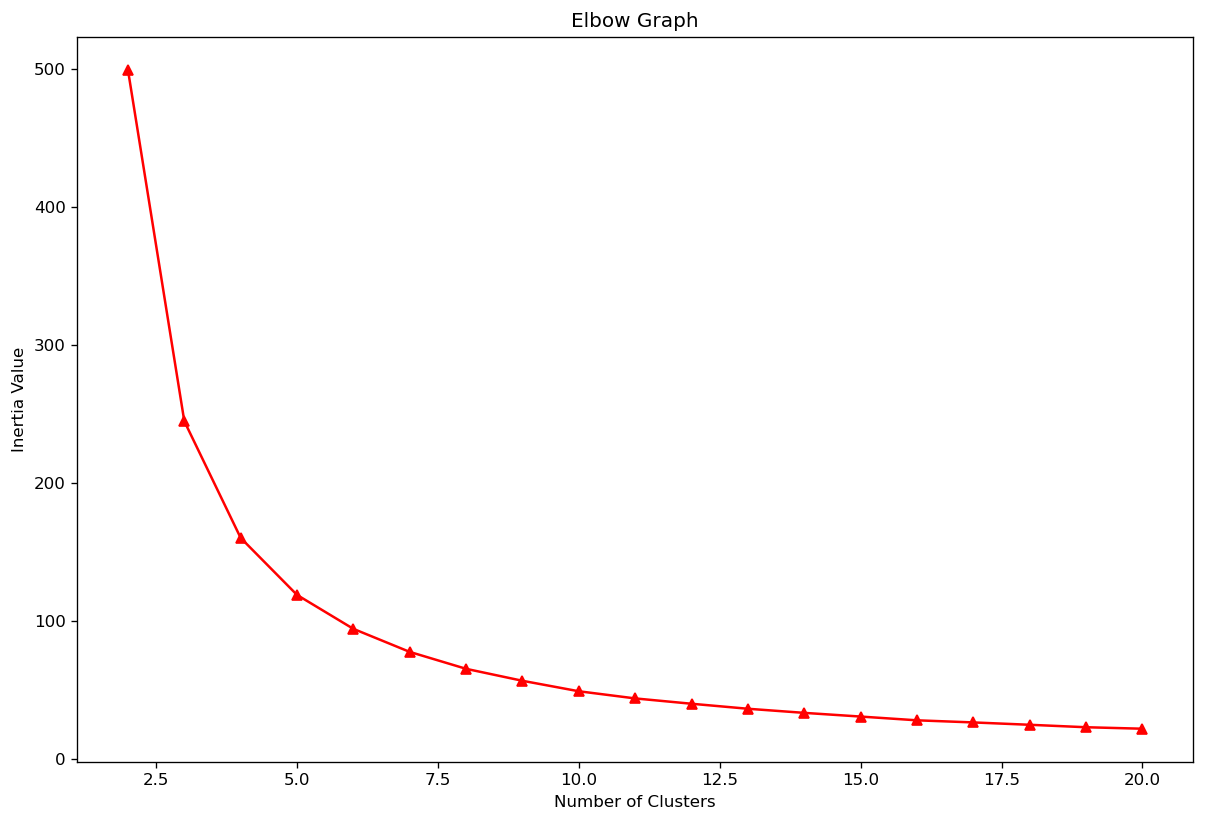

In [40]:
inertia_values = []

for k in range(1, 20):
    model3 = KMeans(n_clusters = k)
    model3.fit(Y2)
    inertia_values.append(model3.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [41]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

4

In [42]:
kmeans = KMeans(kl.elbow, init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(Y2)
Y2 = Y2.values

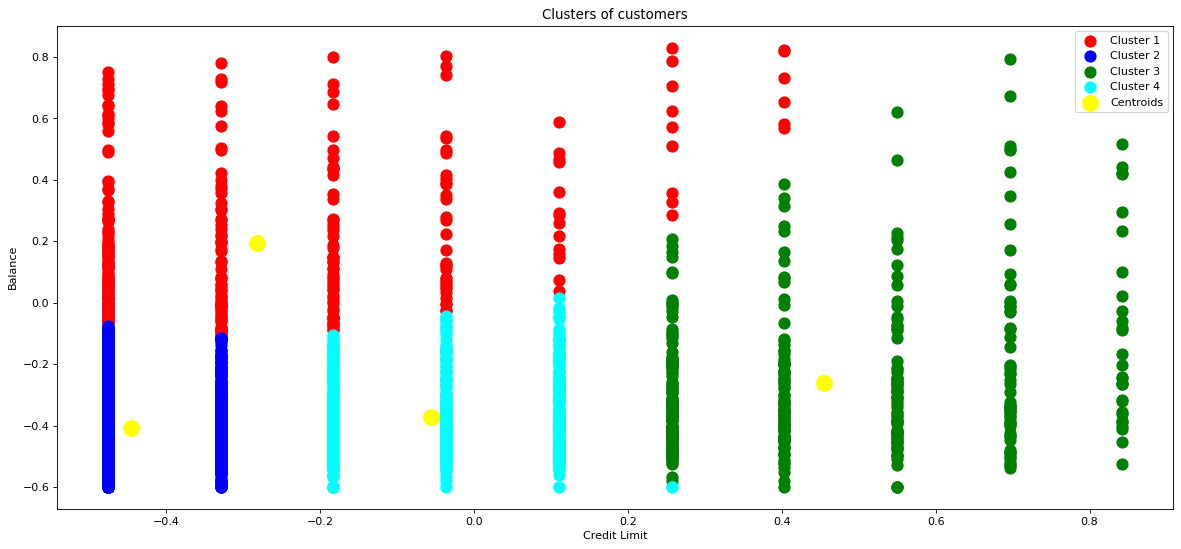

In [43]:
plt.figure(figsize=(18, 8), dpi=80)
plt.scatter(Y2[y_kmeans == 0, 0], Y2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y2[y_kmeans == 1, 0], Y2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y2[y_kmeans == 2, 0], Y2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y2[y_kmeans == 3, 0], Y2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Credit Limit')
plt.ylabel('Balance')
plt.legend()
plt.show()

### It's obvious now that outliers removal in this dataset wasn't the best idea, and handling the data as much as possible through standardization and normalization was essential. Yet, we are going to use PCA declared earlier to reduce dimensionality of the dataset and give the best, accurate clusters

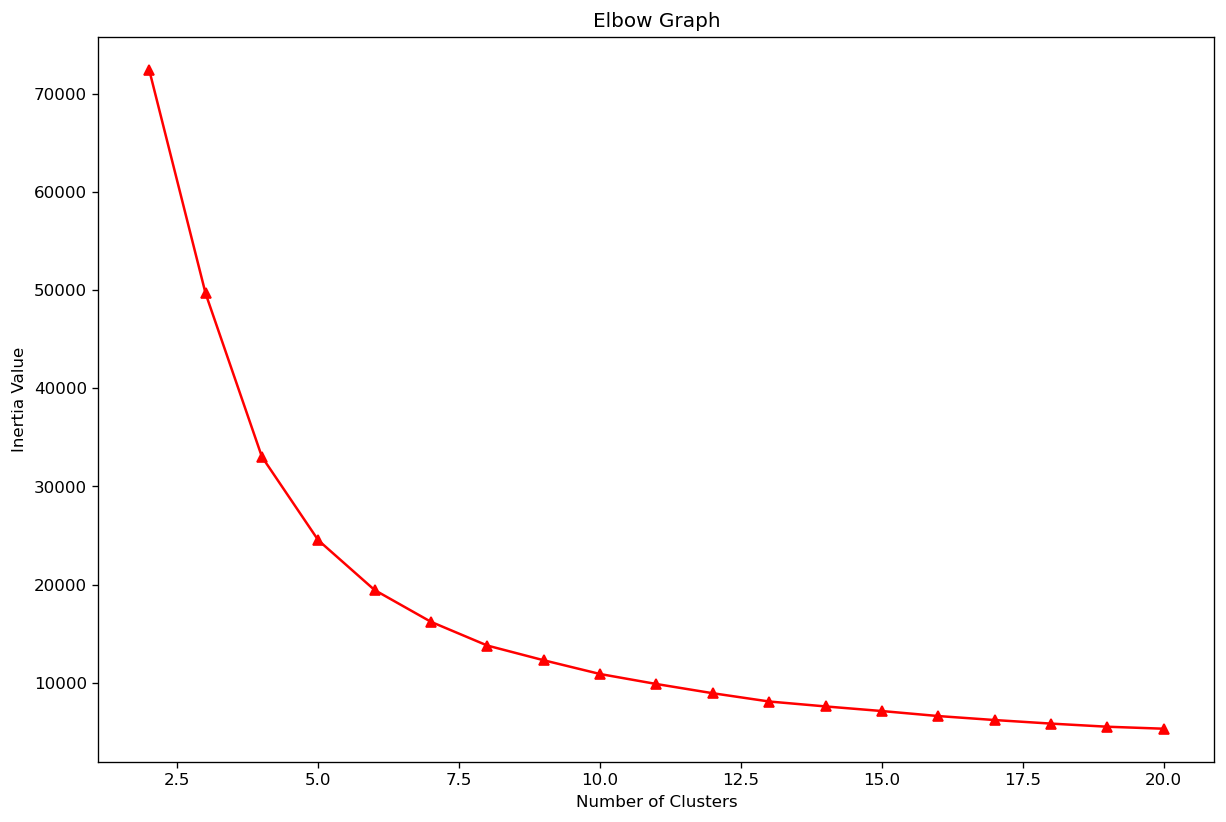

In [63]:
inertia_values = []

for k in range(1, 20):
    model = KMeans(n_clusters = k)
    model.fit(X_principal)
    inertia_values.append(model.inertia_)

plt.figure(figsize = (12, 8), dpi = 120)
plt.plot(range(2, 21), inertia_values, color = 'r', marker = '^')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.title('Elbow Graph')
plt.show()

In [64]:
kl = KneeLocator(range(1, 20), inertia_values, curve = 'convex', direction = 'decreasing')
kl.elbow

5

In [65]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_principal)

KMeans(n_clusters=5)

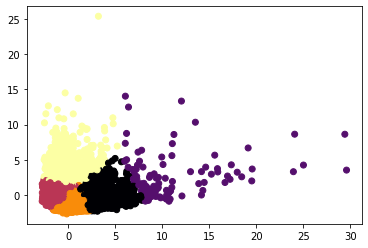

In [78]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 5).fit_predict(X_principal),cmap ='inferno_r') 
plt.show() 

### Beginning now with the agglomerative clustering, but before creating our model, we have to determine the right number of clusters we will pass to the model for the most accurate clustering, here I used the silhouette score method to determine it

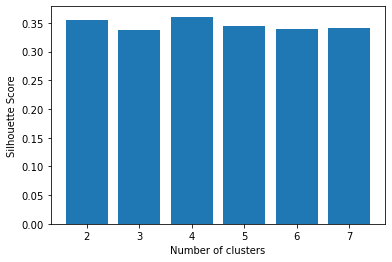

In [48]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### Highest number is equal to 4, so 4 is the value we would be using

In [49]:
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df) 

### Creating a dendrogram to visualize relation between the "BALANCE" and "CREDIT_LIMIT" columns

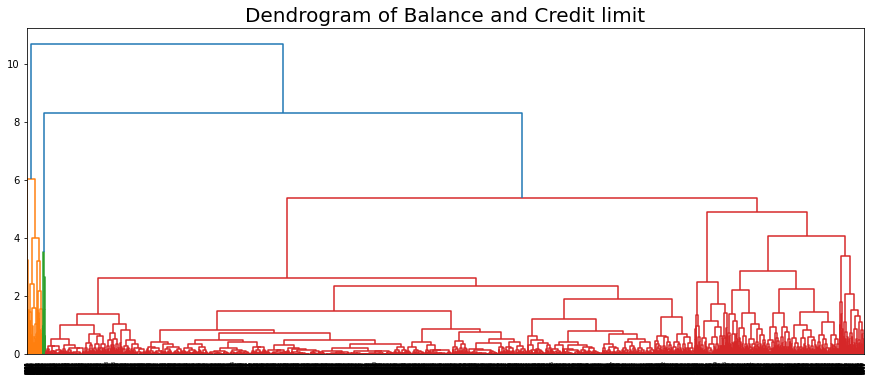

In [56]:
plt.figure(figsize=(15,6))
dendrogram = shc.dendrogram(shc.linkage(df.iloc[:,[0,12]].values, method = 'complete'))
plt.title('Dendrogram of Balance and Credit limit', fontsize = 20)
plt.show()

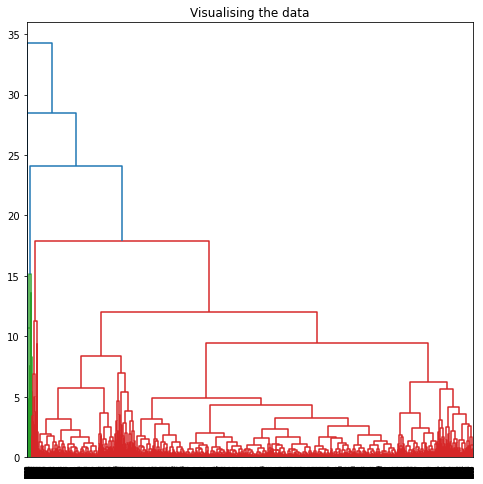

In [57]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='complete')))

### Using PCA to compare the results of the agglomerative clustering and reducing the data to have the most accurate clustering and plots

In [60]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=4)

No handles with labels found to put in legend.


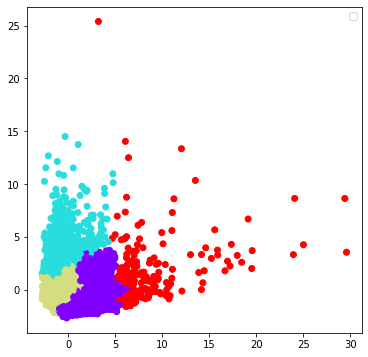

In [62]:
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = 4).fit_predict(X_principal), cmap ='rainbow') 
plt.legend()
plt.show() 

### The differences between k-means and agglomerative clustering can be viewed from the PCA scatterplots of both algorithms and is barely distinguished, yet when it comes to data clustered we can tell that most data points were in the down left-most corner of both plots and the right most is scattered randomly indicating values that might be too extreme. 